In [1]:
#Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Importing Data in to dataframes

companies = pd.read_csv("Datasets/companies.csv", encoding='palmos')
round2 = pd.read_csv("Datasets/rounds2.csv", encoding='palmos')

In [3]:
#Dataframe shape

print(round2.shape)
print(companies.shape)

(114949, 6)
(66368, 10)


### Checkpoint 1: Data Cleaning

##### How many unique companies are present in rounds2?

In [4]:
#Renaming column of round 2 from company_permalink -> permalink
round2.rename(columns={"company_permalink": "permalink"}, inplace=True)

#Converting permalink to lower case as there are cases where it has same value but case sensitive
companies.permalink = companies.permalink.apply(lambda x : x.lower())
round2.permalink = round2.permalink.apply(lambda x : x.lower())

In [5]:
print("There are total ", round2.permalink.unique().shape[0], " unique companies in round2.")

There are total  66368  unique companies in round2.


##### How many unique companies are present in companies?

In [6]:
print("There are total ", companies.permalink.unique().shape[0], " unique companies in companies table.")

There are total  66368  unique companies in companies table.


##### In the companies data frame, which column can be used as the unique key for each company? 
--> permalink

##### Are there any companies in the rounds2 file which are not present in companies? 

In [7]:
companies["permalink"].isin(round2["permalink"]).value_counts()

True    66368
Name: permalink, dtype: int64

As number of unique companies and the number of companies in the round2 which are in comapnies table is same, there are NO missing companies which are in round2 but not in companies.

##### Merge the two data frames so that all variables (columns) in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame. How many observations are present in master_frame?

In [8]:
master_frame = pd.merge(round2, companies, on="permalink")
print(master_frame.shape)
master_frame.head()

(114949, 15)


,permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


### Data Cleaning in Master Dataframe

In [9]:
master_frame.isnull().sum()

permalink                      0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
dtype: int64

In [10]:
master_frame["funding_round_type"].unique()

array(['venture', 'seed', 'undisclosed', 'equity_crowdfunding',
       'convertible_note', 'private_equity', 'debt_financing', 'angel',
       'grant', 'secondary_market', 'post_ipo_equity', 'post_ipo_debt',
       'product_crowdfunding', 'non_equity_assistance'], dtype=object)

In [11]:
master_frame = master_frame[pd.notnull(master_frame["category_list"])]
master_frame.isnull().sum()

permalink                      0
funding_round_permalink        0
funding_round_type             0
funding_round_code         80885
funded_at                      0
raised_amount_usd          17624
name                           1
homepage_url                5163
category_list                  0
status                         0
country_code                7007
state_code                  9220
region                      8462
city                        8459
founded_at                 18691
dtype: int64

In [12]:
master_frame = master_frame[pd.notnull(master_frame["country_code"])]
master_frame.isnull().sum()

permalink                      0
funding_round_permalink        0
funding_round_type             0
funding_round_code         75198
funded_at                      0
raised_amount_usd          16003
name                           1
homepage_url                4220
category_list                  0
status                         0
country_code                   0
state_code                  2213
region                      1455
city                        1452
founded_at                 16063
dtype: int64

In [13]:
master_frame = master_frame[pd.notnull(master_frame["raised_amount_usd"])]
master_frame.isnull().sum()

permalink                      0
funding_round_permalink        0
funding_round_type             0
funding_round_code         61753
funded_at                      0
raised_amount_usd              0
name                           1
homepage_url                3251
category_list                  0
status                         0
country_code                   0
state_code                  1731
region                      1184
city                        1181
founded_at                 13369
dtype: int64

For now we don't need funding_round_code, homepage_url, state_code, region, city and founded_at. <br>
Hence Keeping the missing values for now.

In [14]:
print(master_frame.shape)

(88529, 15)


### Checkpoint 2: Funding Type Analysis

##### Condition <br> Spark Funds wants to invest between 5 to 15 million USD per investment round

In [15]:
investment_type = ['venture', 'seed', 'angel', 'private_equity']
selected_funds = master_frame[master_frame["funding_round_type"].isin(investment_type)]

In [16]:
# Most representative value of the investment amount based on type

print("\n\nMEAN")
print(selected_funds.groupby(['funding_round_type'])['raised_amount_usd'].mean())
print("\n\nMEDIAN")
print(selected_funds.groupby(['funding_round_type'])['raised_amount_usd'].median())
print("\n\nSUM")
print(selected_funds.groupby(['funding_round_type'])['raised_amount_usd'].sum())



MEAN
funding_round_type
angel             9.715739e+05
private_equity    7.393849e+07
seed              7.477937e+05
venture           1.172422e+07
Name: raised_amount_usd, dtype: float64


MEDIAN
funding_round_type
angel               414906.0
private_equity    20000000.0
seed                300000.0
venture            5000000.0
Name: raised_amount_usd, dtype: float64


SUM
funding_round_type
angel             4.274925e+09
private_equity    1.345680e+11
seed              1.577471e+10
venture           5.605234e+11
Name: raised_amount_usd, dtype: float64


In [17]:
#Applying condition for the Spark Funds

In [18]:
#Number of venture and private_equity
print(selected_funds.funding_round_type.value_counts())
print("\n\nVenture: \n ", (selected_funds["funding_round_type"] == "venture").value_counts())
print("\n\nPrivate Equity: \n ", (selected_funds["funding_round_type"] == "private_equity").value_counts())

venture           47809
seed              21095
angel              4400
private_equity     1820
Name: funding_round_type, dtype: int64


Venture: 
  True     47809
False    27315
Name: funding_round_type, dtype: int64


Private Equity: 
  False    73304
True      1820
Name: funding_round_type, dtype: int64


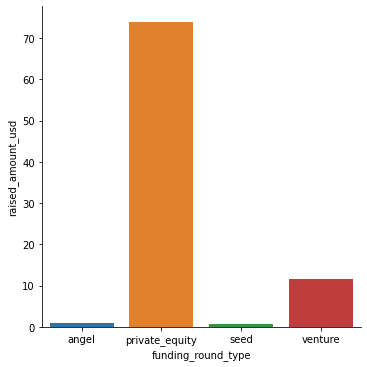

In [19]:
#Finding the most suitable investment type as per the coditions mentioned by spark funds
fund_round_grp = selected_funds.groupby('funding_round_type')['raised_amount_usd'].mean().reset_index()
fund_round_grp.raised_amount_usd = round(fund_round_grp.raised_amount_usd/1000000, 4)
sns.catplot(data = fund_round_grp, x=fund_round_grp['funding_round_type'], y= fund_round_grp['raised_amount_usd'], kind='bar')

fund_round_grp = fund_round_grp.loc[(fund_round_grp["raised_amount_usd"] >= 5) & (fund_round_grp["raised_amount_usd"]<=15)]

In [20]:
fund_round_grp

,funding_round_type,raised_amount_usd
3,venture,11.7242


### <font color='RED'>Type of investment suitable for Spark Funds is <font color='BLUE'>venture</font></font>

### Checkpoint 3: Country Analysis

##### Spark Funds wants to see the top nine countries which have received the highest total funding (across ALL sectors for the chosen investment type)

In [21]:
#Separating venture funding type from master dataframe

venture_fund = master_frame[master_frame["funding_round_type"].isin(["venture"])]
print(venture_fund.shape)
venture_fund.head()

(47809, 15)


,permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.0,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011


In [22]:
#Grouping on top 9 countries which has received max total funding

top9 = venture_fund.groupby('country_code')['raised_amount_usd'].sum().reset_index().sort_values(['raised_amount_usd'], ascending =False).head(9)
top9

,country_code,raised_amount_usd
94,USA,4.200680e+11
15,CHN,3.933892e+10
29,GBR,2.007281e+10
39,IND,1.426151e+10
12,CAN,9.482218e+09
28,FRA,7.226851e+09
42,ISR,6.854350e+09
21,DEU,6.306922e+09
45,JPN,3.167647e+09


##### From the above list the English speaking contries are
-  USA
-  GBR
-  IND
-  CAN


In [23]:
english_speaking = ['USA', 'GBR', 'CAD', 'IND']

#Top 3 english speaking countries are

top3 = top9[top9['country_code'].isin(english_speaking)]
top3

,country_code,raised_amount_usd
94,USA,4.200680e+11
29,GBR,2.007281e+10
39,IND,1.426151e+10


##### The top three English-speaking countries in the data frame are USA, GBR and IND

In [24]:
contry_venture_fund = venture_fund[venture_fund['country_code'].isin(english_speaking)]
contry_venture_fund.shape

(38803, 15)

### Checkpoint 4: Sector Analysis 1

##### Given Rule
-  The first string before the vertical bar will be considered the primary sector from category_list	

In [25]:
print(master_frame.shape)
print(master_frame.info())
print(master_frame.category_list.value_counts())

(88529, 15)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 88529 entries, 0 to 114947
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   permalink                88529 non-null  object 
 1   funding_round_permalink  88529 non-null  object 
 2   funding_round_type       88529 non-null  object 
 3   funding_round_code       26776 non-null  object 
 4   funded_at                88529 non-null  object 
 5   raised_amount_usd        88529 non-null  float64
 6   name                     88528 non-null  object 
 7   homepage_url             85278 non-null  object 
 8   category_list            88529 non-null  object 
 9   status                   88529 non-null  object 
 10  country_code             88529 non-null  object 
 11  state_code               86798 non-null  object 
 12  region                   87345 non-null  object 
 13  city                     87348 non-null  object 
 14  founded_a

In [26]:
# Storing the primary sector as per the rule

master_frame["primary_sector"] = master_frame.category_list.apply(lambda x : x.split('|')[0] )

## Mapping of Sectors

In [27]:
#Loading data from mapping csv file 

mapping = pd.read_csv("Datasets/mapping.csv")
mapping = mapping[pd.notnull(mapping.category_list)]
mapping.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 687 entries, 1 to 687
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   category_list                            687 non-null    object
 1   Automotive & Sports                      687 non-null    int64 
 2   Blanks                                   687 non-null    int64 
 3   Cleantech / Semiconductors               687 non-null    int64 
 4   Entertainment                            687 non-null    int64 
 5   Health                                   687 non-null    int64 
 6   Manufacturing                            687 non-null    int64 
 7   News, Search and Messaging               687 non-null    int64 
 8   Others                                   687 non-null    int64 
 9   Social, Finance, Analytics, Advertising  687 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 59.0+ KB


In [28]:
mapping.isnull().sum()

category_list                              0
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

##### We need a column in mapping which contains the Sector for the category_list

In [29]:
#Function return the sector (where value is 1 in the cat column)

def get_sector(row):    
    for c in mapping.columns:
        if row[c] == 1:
            return c
        

In [30]:
mapping['main_sector'] = mapping.apply(get_sector, axis =1)

In [31]:
# We no more need encoding as we have category and sector columns
mapping = pd.DataFrame(mapping, columns=['category_list', 'main_sector'])
mapping.columns

Index(['category_list', 'main_sector'], dtype='object')

In [32]:
#To perform merge we need same column name hence renaming category_list -> primary_sector
mapping.rename(columns={"category_list": "primary_sector"}, inplace=True)
mapping.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 687 entries, 1 to 687
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   primary_sector  687 non-null    object
 1   main_sector     687 non-null    object
dtypes: object(2)
memory usage: 16.1+ KB


In [33]:
#Before Merging masater_frame and mapping we need to lowercase the common values to be on safer side
master_frame.primary_sector = master_frame.primary_sector.apply(lambda x: x.lower())
mapping.primary_sector = mapping.primary_sector.apply(lambda x: x.lower())

### Mapping dataset has some problems (Need Data Cleaning)

In [34]:
#Checking different categories which are in mapping but not in out dataframe
list_cat_mapping = mapping.primary_sector.unique()
list_cat_master = master_frame.primary_sector.unique()
list_fin = np.setdiff1d(list_cat_mapping, list_cat_master)
print(list_fin, "\n\n")

# At most of the time 'na' is given as '0' Need to replace
mapping.primary_sector= mapping.primary_sector.apply(lambda x: x.replace('0','na'))
list_cat_mapping = mapping.primary_sector.unique()
list_cat_master = master_frame.primary_sector.unique()
list_fin = np.setdiff1d(list_cat_mapping, list_cat_master)
print(list_fin, "\n\n")

# In above list I can observe a value "enterprise 2.na"... need to replace with correct
enterprise = master_frame.loc[master_frame['primary_sector'].str.contains('enterprise 2.', case=False)]
enterprise

# enterprise 2.na should be enterprise 2.0 (need to replace 2.na with 2.0)
mapping.primary_sector= mapping.primary_sector.apply(lambda x: x.replace('2.na','2.0'))
list_cat_mapping = mapping.primary_sector.unique()
list_cat_master = master_frame.primary_sector.unique()
list_fin = np.setdiff1d(list_cat_mapping, list_cat_master)
print(list_fin, "\n\n")

['0notechnology' '0tural language processing' '0tural resources'
 '0vigation' 'a0lytics' 'alter0tive medicine' 'big data a0lytics'
 'business a0lytics' 'can0bis' 'career ma0gement' 'chi0 internet'
 'cloud ma0gement' 'contact ma0gement' 'digital rights ma0gement'
 'digital sig0ge' 'document ma0gement' 'educatio0l games'
 'energy ma0gement' 'energy storage' 'event ma0gement' 'fi0nce'
 'fi0nce technology' 'fi0ncial exchanges' 'fi0ncial services'
 'film distribution' 'fleet ma0gement' 'flowers' 'gover0nce'
 'identity ma0gement' 'innovation ma0gement'
 'intellectual asset ma0gement' 'investment ma0gement' 'it ma0gement'
 'jour0lism' 'knowledge ma0gement' 'lead ma0gement' 'lotteries'
 'low bid auctions' 'medical professio0ls' 'mobile a0lytics'
 'multi-level marketing' 'perso0l branding' 'perso0l data'
 'perso0l fi0nce' 'perso0l health' 'perso0lization' 'pervasive computing'
 'plumbers' 'predictive a0lytics' 'professio0l networking'
 'professio0l services' 'project ma0gement' 'promotio0l'
 'p

##### Merging mapping with master_frame to attach additional column of main_sector in master_frame

In [35]:
master_frame = pd.merge(master_frame, mapping, on = "primary_sector", how='left')
print(master_frame.columns)
print(master_frame.shape)
master_frame.head()

Index(['permalink', 'funding_round_permalink', 'funding_round_type',
       'funding_round_code', 'funded_at', 'raised_amount_usd', 'name',
       'homepage_url', 'category_list', 'status', 'country_code', 'state_code',
       'region', 'city', 'founded_at', 'primary_sector', 'main_sector'],
      dtype='object')
(88529, 17)


,permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,media,Entertainment
1,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,application platforms,"News, Search and Messaging"
2,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,curated web,"News, Search and Messaging"
3,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,01-07-2014,41250.0,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN,games,Entertainment
4,/organization/0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,11-09-2009,43360.0,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,biotechnology,Cleantech / Semiconductors


In [36]:
#Removing unwanted columns
master_frame = master_frame.drop(['funding_round_permalink', 'funding_round_code', 'city','funded_at', 'homepage_url', 'state_code', 'region', 'founded_at'], axis = 1)
master_frame.head()

,permalink,funding_round_type,raised_amount_usd,name,category_list,status,country_code,primary_sector,main_sector
0,/organization/-fame,venture,10000000.0,#fame,Media,operating,IND,media,Entertainment
1,/organization/-qounter,seed,700000.0,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,application platforms,"News, Search and Messaging"
2,/organization/0-6-com,venture,2000000.0,0-6.com,Curated Web,operating,CHN,curated web,"News, Search and Messaging"
3,/organization/01games-technology,undisclosed,41250.0,01Games Technology,Games,operating,HKG,games,Entertainment
4,/organization/0ndine-biomedical-inc,seed,43360.0,Ondine Biomedical Inc.,Biotechnology,operating,CAN,biotechnology,Cleantech / Semiconductors


##### Filtering dataframe for only three contries i.e. english_speaking = ['USA', 'GBR','IND'] and Funding type is venture

In [37]:
english_speaking = ['USA', 'GBR','IND']
master_frame_cp5 = master_frame[(master_frame["country_code"].isin(english_speaking)) & (master_frame["funding_round_type"] == 'venture')]
print(master_frame_cp5.shape)

(38803, 9)


##### Filtering dataframe for investments range of 5-15 M USD

In [38]:
master_frame_cp5 = master_frame_cp5[(master_frame_cp5["raised_amount_usd"] >= 5000000) & (master_frame_cp5["raised_amount_usd"] <=15000000)]
master_frame_cp5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13013 entries, 0 to 88518
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   permalink           13013 non-null  object 
 1   funding_round_type  13013 non-null  object 
 2   raised_amount_usd   13013 non-null  float64
 3   name                13013 non-null  object 
 4   category_list       13013 non-null  object 
 5   status              13013 non-null  object 
 6   country_code        13013 non-null  object 
 7   primary_sector      13013 non-null  object 
 8   main_sector         13012 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1016.6+ KB


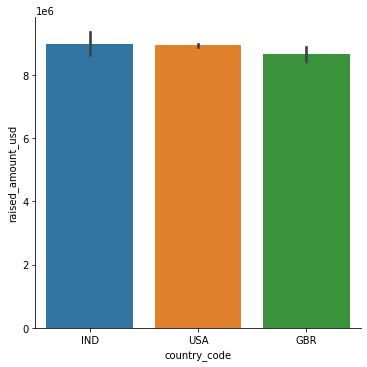

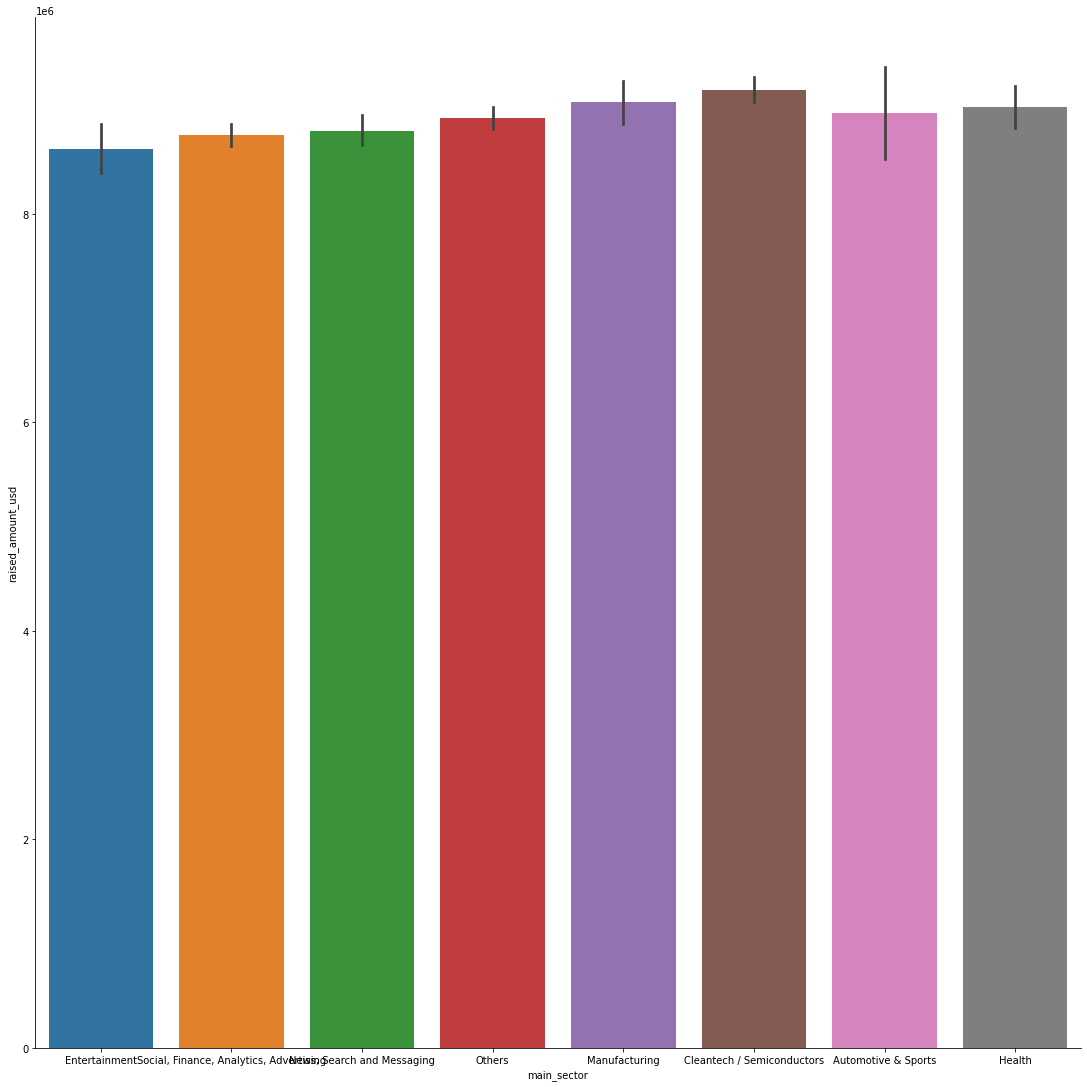

In [39]:
#Random plots to get feel of the data
sns.catplot(data=master_frame_cp5, y=master_frame_cp5['raised_amount_usd'], x=master_frame_cp5['country_code'], kind='bar')
plt.show()

sns.catplot(data=master_frame_cp5, y=master_frame_cp5['raised_amount_usd'], x=master_frame_cp5['main_sector'], kind='bar', height=15)
plt.show()

##### Creating separate Dataframes for seaparate countries

In [40]:
USA = master_frame_cp5[master_frame_cp5['country_code'] == 'USA']
GBR = master_frame_cp5[master_frame_cp5['country_code'] == 'GBR']
IND = master_frame_cp5[master_frame_cp5['country_code'] == 'IND']

##### Total number of investments (count)

In [41]:
# Total number of investments (count)

print("Total Number of investments in the USA is ", USA.shape[0])
print("Total Number of investments in the Britan is ", GBR.shape[0])
print("Total Number of investments in the India is ", IND.shape[0])

Total Number of investments in the USA is  12064
Total Number of investments in the Britan is  621
Total Number of investments in the India is  328


##### Total amount of investment (USD)

In [42]:
#Total amount of investment (USD)
print("Total Number of investments in the USA is ", USA.raised_amount_usd.sum())
print("Total Number of investments in the Britan is ", GBR.raised_amount_usd.sum())
print("Total Number of investments in the India is ", IND.raised_amount_usd.sum())

Total Number of investments in the USA is  107766584223.0
Total Number of investments in the Britan is  5379078691.0
Total Number of investments in the India is  2949543602.0


##### Sector based distributions (based on count of investments)


USA -->
 Others                                     2950
Social, Finance, Analytics, Advertising    2714
Cleantech / Semiconductors                 2350
News, Search and Messaging                 1583
Health                                      909
Manufacturing                               799
Entertainment                               591
Automotive & Sports                         167
Name: main_sector, dtype: int64


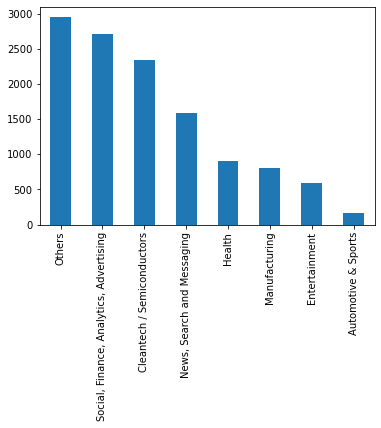





GBR -->
 Others                                     147
Social, Finance, Analytics, Advertising    133
Cleantech / Semiconductors                 130
News, Search and Messaging                  73
Entertainment                               56
Manufacturing                               42
Health                                      24
Automotive & Sports                         16
Name: main_sector, dtype: int64


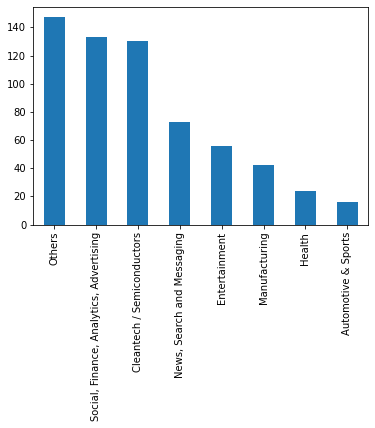





 IND -->
 Others                                     110
Social, Finance, Analytics, Advertising     60
News, Search and Messaging                  52
Entertainment                               33
Manufacturing                               21
Cleantech / Semiconductors                  20
Health                                      19
Automotive & Sports                         13
Name: main_sector, dtype: int64


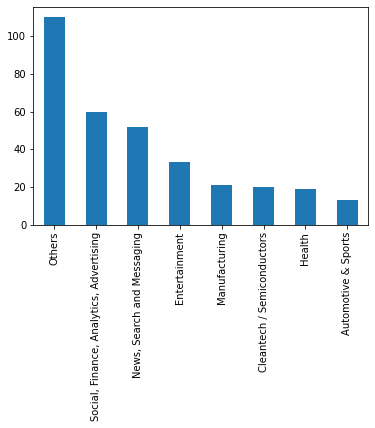

In [43]:
#USA

print("\nUSA -->\n",USA.main_sector.value_counts())
USA.main_sector.value_counts().plot(kind='bar')
plt.show()
print("\n\n")

#GBR

print("\nGBR -->\n", GBR.main_sector.value_counts())
GBR.main_sector.value_counts().plot(kind='bar')
plt.show()
print("\n\n")

#IND

print("\n IND -->\n", IND.main_sector.value_counts())
IND.main_sector.value_counts().plot(kind='bar')
plt.show()
print("\n\n")

##### For the top sector count-wise, which company received the highest investment?

In [44]:
# USA Top Company for Sector Others
USA_other_pivot = pd.pivot_table(data = USA[USA.main_sector == 'Others'], values='raised_amount_usd', index='permalink', aggfunc =sum)
USA_other_pivot = USA_other_pivot.sort_values(by = 'raised_amount_usd', ascending=False)
print(USA_other_pivot.head(1),"\n\n")

# USA Top Company for Sector Social, Finance, Analytics, Advertising
USA_sfaa_pivot = pd.pivot_table(data = USA[USA.main_sector == 'Social, Finance, Analytics, Advertising'], values='raised_amount_usd', index='permalink', aggfunc =sum)
USA_sfaa_pivot = USA_sfaa_pivot.sort_values(by = 'raised_amount_usd', ascending=False)
print(USA_sfaa_pivot.head(1),"\n\n")

                           raised_amount_usd
permalink                                   
/organization/virtustream         64300000.0 


                           raised_amount_usd
permalink                                   
/organization/shotspotter         67933006.0 




In [45]:
# GBR Top Company for Sector Others
GBR_other_pivot = pd.pivot_table(data = GBR[GBR.main_sector == 'Others'], values='raised_amount_usd', index='permalink', aggfunc =sum)
GBR_other_pivot = GBR_other_pivot.sort_values(by = 'raised_amount_usd', ascending=False)
print(GBR_other_pivot.head(1),"\n\n")

# GBR Top Company for Sector Social, Finance, Analytics, Advertising
GBR_sfaa_pivot = pd.pivot_table(data = GBR[GBR.main_sector == 'Social, Finance, Analytics, Advertising'], values='raised_amount_usd', index='permalink', aggfunc =sum)
GBR_sfaa_pivot = GBR_sfaa_pivot.sort_values(by = 'raised_amount_usd', ascending=False)
print(GBR_sfaa_pivot.head(1),"\n\n")

                              raised_amount_usd
permalink                                      
/organization/electric-cloud         37000000.0 


                                     raised_amount_usd
permalink                                             
/organization/celltick-technologies         37500000.0 




In [46]:
# IND Top Company for Sector Others
IND_other_pivot = pd.pivot_table(data = IND[IND.main_sector == 'Others'], values='raised_amount_usd', index='permalink', aggfunc =sum)
IND_other_pivot = IND_other_pivot.sort_values(by = 'raised_amount_usd', ascending=False)
print(IND_other_pivot.head(1),"\n\n")

# IND Top Company for Sector Others
IND_sfaa_pivot = pd.pivot_table(data = IND[IND.main_sector == 'Social, Finance, Analytics, Advertising'], values='raised_amount_usd', index='permalink', aggfunc =sum)
IND_sfaa_pivot = IND_sfaa_pivot.sort_values(by = 'raised_amount_usd', ascending=False)
print(IND_sfaa_pivot.head(1),"\n\n")

                            raised_amount_usd
permalink                                    
/organization/firstcry-com         39000000.0 


                               raised_amount_usd
permalink                                       
/organization/manthan-systems         50700000.0 




### <font color='Green'>Summary of Best comapnies as per the top and second best Sectors</font>

##### USA

- Best company for top sector i.e. Others is **virtustream** with funding amount 64.3m.
- Best company for second top sector i.e. Social, Finance, Analytics, Advertising is **hotspotter** with funding amount 67.9m.

##### GBR

- Best company for top sector i.e. Others is **electric-cloud** with funding amount 37m.
- Best company for second top sector i.e. Social, Finance, Analytics, Advertising is **celltick-technologies** with funding amount  37.5m.


##### IND

- Best company for top sector i.e. Others is **firstcry-com** with funding amount 39m.
- Best company for second top sector i.e. Social, Finance, Analytics, Advertising is **manthan-systems** with funding amount 50.7m.

## Checkpoint 6: Plots

In [47]:
print(master_frame.shape)
master_frame.head()

(88529, 9)


,permalink,funding_round_type,raised_amount_usd,name,category_list,status,country_code,primary_sector,main_sector
0,/organization/-fame,venture,10000000.0,#fame,Media,operating,IND,media,Entertainment
1,/organization/-qounter,seed,700000.0,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,application platforms,"News, Search and Messaging"
2,/organization/0-6-com,venture,2000000.0,0-6.com,Curated Web,operating,CHN,curated web,"News, Search and Messaging"
3,/organization/01games-technology,undisclosed,41250.0,01Games Technology,Games,operating,HKG,games,Entertainment
4,/organization/0ndine-biomedical-inc,seed,43360.0,Ondine Biomedical Inc.,Biotechnology,operating,CAN,biotechnology,Cleantech / Semiconductors


##### A plot showing the representative amount of investment in each funding type

In [48]:
df_plt1 = pd.pivot_table(data = master_frame, values='raised_amount_usd', index = 'funding_round_type', aggfunc=np.mean).reset_index()
df_plt1.raised_amount_usd = round(df_plt1.raised_amount_usd/1000000,4)
df_plt1 = df_plt1[df_plt1['funding_round_type'].isin(investment_type)] 

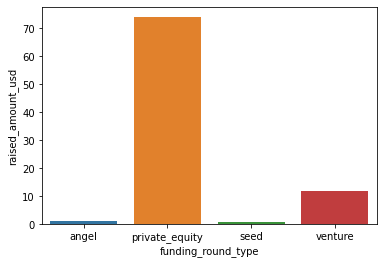

In [49]:

fig = sns.barplot(data = df_plt1, x='funding_round_type', y ='raised_amount_usd')
plt.show()

##### A plot showing the top 9 countries against the total amount of investments of funding type FT.

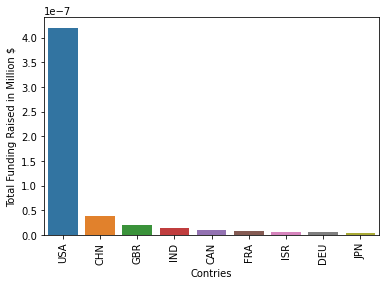

AttributeError: 'AxesSubplot' object has no attribute 'savefig'

In [58]:
top9.raised_amount_usd = (top9.raised_amount_usd/1000000)
fig = sns.barplot(data = top9, x='country_code', y ='raised_amount_usd')
fig.set(xlabel='Contries', ylabel='Total Funding Raised in Million $')
plt.xticks(rotation=90)
plt.show()

##### A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart

In [51]:
#Dataframe containing USA top three sectors and number of funding
USA2 = pd.pivot_table(data = USA, index = ['country_code','main_sector'],values = 'raised_amount_usd', aggfunc= len).reset_index()
USA_top3 = USA2.sort_values(by = 'raised_amount_usd', ascending = False).head(3)
print(USA_top3,"\n\n")

#Dataframe containing GBR top three sectors and number of funding
GBR2 = pd.pivot_table(data = GBR, index = ['country_code','main_sector'],values = 'raised_amount_usd', aggfunc= len).reset_index()
GBR_top3 = GBR2.sort_values(by = 'raised_amount_usd', ascending = False).head(3)
print(GBR_top3,"\n\n")

#Dataframe containing USA top three sectors and number of funding
IND2 = pd.pivot_table(data = IND, index = ['country_code','main_sector'],values = 'raised_amount_usd', aggfunc= len).reset_index()
IND_top3 = IND2.sort_values(by = 'raised_amount_usd', ascending = False).head(3)
print(IND_top3)

  country_code                              main_sector  raised_amount_usd
6          USA                                   Others             2950.0
7          USA  Social, Finance, Analytics, Advertising             2714.0
1          USA               Cleantech / Semiconductors             2350.0 


  country_code                              main_sector  raised_amount_usd
6          GBR                                   Others              147.0
7          GBR  Social, Finance, Analytics, Advertising              133.0
1          GBR               Cleantech / Semiconductors              130.0 


  country_code                              main_sector  raised_amount_usd
6          IND                                   Others              110.0
7          IND  Social, Finance, Analytics, Advertising               60.0
5          IND               News, Search and Messaging               52.0


In [52]:
#merging the results of pivot table in one df to draw the plot
USA_GBR = pd.merge(USA_top3, GBR_top3, how = 'outer')
USA_GBR_IND = pd.merge(USA_GBR, IND_top3, how='outer')

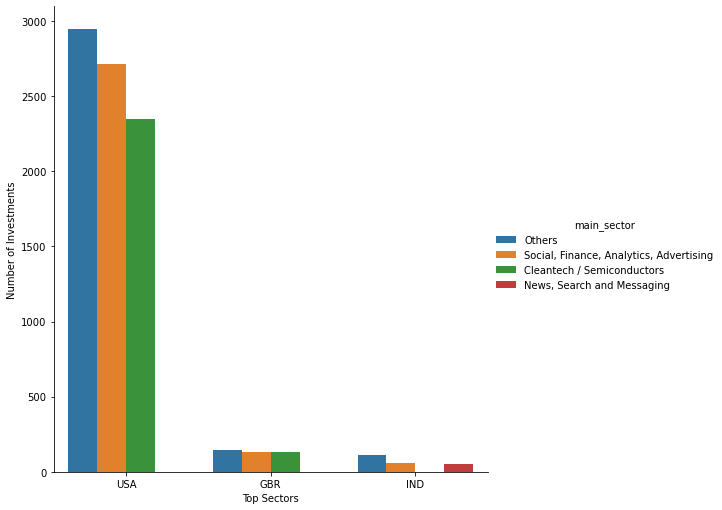

In [56]:
fig = sns.catplot(data = USA_GBR_IND, x='country_code', y ='raised_amount_usd', hue='main_sector', kind='bar', height = 7)
fig.set_axis_labels('Top Sectors', 'Number of Investments')
plt.show()
fig.savefig("Contry_Sector_Plot.png")